<a href="https://colab.research.google.com/github/adolfoguimaraes/datascience/blob/main/code/03_laboratorio_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear 

Para este exemplo, vamos trabalhar com a base de Advertising disponibilizada pelo livro "An Introduction to Statistical Learning". Essa base consiste de 3 atributos que representam os gastos de propaganda (em milhares de dólares) de um determinado produto na TV, Rádio e Jornal. Além disso, é conhecida a quantidade de vendas realizadas (em milhares de unidades) para cada instância.

A base de dados está disponível na pasta `datasets` destes repositório. Para carrega-la vamos utilizar a biblioteca Pandas. Detalhes dessa biblioteca estão fora do escopo destes tutoriais. Sendo assim, apenas vamos usá-la sem tecer muitos detalhes sobre as operações realizadas. Basicamente, vamos utiliza-la para carregar a base de arquivos, extrair informações sobre os dados e plota-los em gráficos que irão nos ajudar a interpretar os dados que estamos trabalhando.

In [6]:
# Carrega a base e imprime os dez primeiros registros da base
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("../datasets/Advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


O dataset possui 3 atributos: TV, Radio e Newspaper. Cada um deles corresponde a quantidade de dólares gastos em propaganda em cada uma das mídias para um produto específico. Já a resposta (*sales*) consiste na quantidade de produtos vendidos para cada produto. Esse dataset possui 200 instâncias.

A partir dessa análise inicial juntamente com o estudo dos modelos de regresssão podemos construir um modelo que ajude a determinar como poderíamos gastar o dinheiro designado para propaganda no futuro.

Além dessa pergunta mais geral, vamos querer responder: 

* Existe uma relação entre o dinheiro gasto em propaganda e a quantidade de vendas?
* Quão forte é esse relacionamento?
* Quais são os tipos de propaganda que contribuem para as vendas?
* Qual o efeito de cada tipo de propaganda nas vendas?
* Dado um gasto específico em propaganda, é possível prever quanto será vendido?
* Como podemos interpretar diferentes modelos de Machine Learning para o mesmo problema? 

Para tentar responder essas perguntas vamos fazer uma análise inicial da base de dados para extrair algumas informações interessantes sobre os dados. 

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Os dados dos quatis podem ser melhor visualizados com a ajuda dos boxplot. Observe que com exceção dos valores de newspaper, os demais dados tem valores bem distribuídos. O atributo newspaper possui alguns outliers que podem (ou não) influenciar nos modelos de classificação. Vamos analisar um pouco mais a correlação entre os atribuitos para extrair mais informações sobre eles.

<AxesSubplot:>

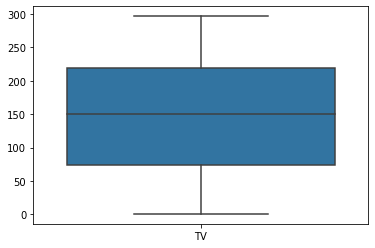

In [9]:
sns.boxplot(data=data[['TV']])

<AxesSubplot:>

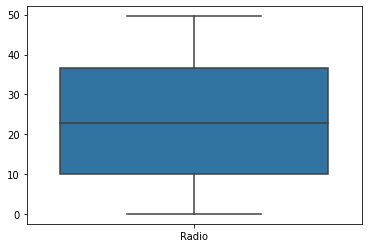

In [10]:
sns.boxplot(data=data[['Radio']])

<AxesSubplot:>

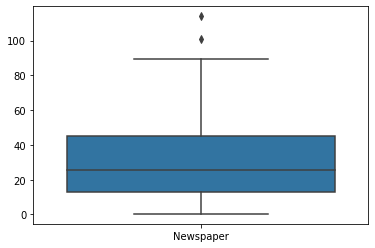

In [11]:
sns.boxplot(data=data[['Newspaper']])

Analisando os gráficos de boxplot, o que chama atenção é o do atributo newspaper que apresenta alguns outliers. Percebe-se que a maioria dos valores para este atributo estão compreendidos em uma estreita faixa de valores e que alguns valores estão bem distantes nesta distribuição. Ainda não podemos afirmar muita coisa, mas, sem dúvidas, são dados que devem ser analisados.

Para que a gente possa ter uma idéia melhor de como estes atributos se comportam, vamos analisar a matriz de correlação.

<AxesSubplot:>

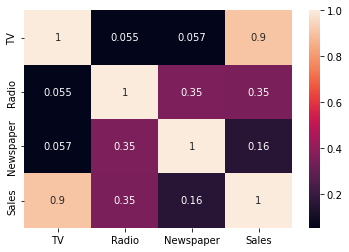

In [12]:
data_corr = data.corr()
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True)

Na regressão linear, utilizamos os valores dos atributos para prever um determinado retorno de vendas a partir do investimento nas áreas representadas pelos atributos. Sendo assim, uma análise interessante que se pode fazer é como tais atributos se relacionam com o objetivo final: o campo `sales`. Perceba que existe uma forte correlação entre TV e vendas. Diferente da relação entre newspaper e vendas. Essa tabela nos mostra o quão forte é a relação linear entre esses atributos. Claramente, quanto maior o investimento em TV e radio maior o retorno em vendas. Tal relação é válida para o atributo newspaper, no entanto, ela não é tão forte quanto os demais. 

Com isso já conseguimos responder algumas perguntas listadas anteriomente. Vamos entender melhor essa relação a partir da implementação dos modelos de regressão linear a seguir. 

## Aplicando o modelo de regressão linear 

In [13]:
from sklearn.linear_model import LinearRegression

O primeiro passo é separar dos dados (`features`) das classes (`labels`) dos dados que serão utilizados para treinar nosso modelo. Para o primeiro exemplo, vamos utilizar apenas um atributo, logo, vamos construir um modelo de regressão linear simples.

In [14]:
# Carregando os dados de treinamento e os labels

feature_cols = ['TV'] # Carregando apenas os dados de TV

X = data[feature_cols] # Dados de Treinamento
y = data.Sales # Labels dos dados de Treinamento

Em seguida, vamos instanciar o modelo de Regressão Linear do ScikitLearn e treina-lo com os dados.

In [15]:
lm = LinearRegression() # Instanciando o modelo
lm.fit(X, y) # Treinando com os dados de treinamento

LinearRegression()

Como dito anteriormente, o modelo aprendeu, baseado no conjunto de dados, valores para β0\beta_0β0​ e β1\beta_1β1​. Vamos visualizar os valores encontrados.

In [16]:
#Imprimindo beta_0
print("Valor de Beta_0: " + str(lm.intercept_))

#Imprimindo beta_1
print("Valor de Beta_1: " + str(lm.coef_[0]))

Valor de Beta_0: 6.9748214882298925
Valor de Beta_1: 0.05546477046955886


Esse valores representam os valores de $\beta_0$ e $\beta_1$ da nossa equação que representa um modelo simples de regressão linear onde é levado em consideração somente um atributo.

Com esses valores é possível estimar quanto será vendido dado um determinado gasto em propaganda de TV. Além disso, o coeficiente $\beta_1$ nos conta mais sobre o problema.

O valor de $0.05546477046955886$ indica que cada unidade que aumentarmos em propaganda de TV implica em um aumento de $0.05546477046955886$ nas vendas. Em outras palavras, cada $1.000$ gastos em TV está associado com um aumento de 55.464 de unidades nas vendas.

Vamos usar esses valores para estimar quanto será vendido se gastarmos $50000$ em TV.

$y = 6.9748214882298925 + 0.05546477046955886 \times 50$
$y = 9.7480600117$

No entanto, nosso objetivo não é fazer isso manualmente. A idéia é construir o modelo e utiliza-lo para fazer a estimativa de valores. Para isso, vamos utilizar o método `predict`.

In [17]:
lm.predict([[50]])

array([9.74806001])

In [18]:
lm.predict([[50], [200], [10]])

array([ 9.74806001, 18.06777558,  7.52946919])

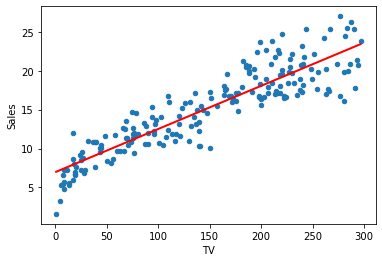

In [19]:
'''
O código a seguir faz a predição para o menor e maior valores de X na base de treinamento. Estes valores
são utilizados para construir uma reta que é plotada sobre os dados de treinamento.
'''

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]}) # Menor e Maior valores de X na base de treinamento
preds = lm.predict(X_new) # Predição destes valores
data.plot(kind='scatter', x='TV', y='Sales') # Plotagem dos valores da base de treinamento
plt.plot(X_new, preds, c='red', linewidth=2) # Plotagem da reta

A reta em vermelho representa o modelo de regressão linear construído a partir dos dados passados.

Podemos estender o modelo visto anteriormente para trabalhar com mais de um atributo, ou seja, regressão linear múltipla. 

In [20]:
# Carregando os dados de X e y do dataset
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

#Instanciando e treinando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X, y)

#Imprimindo os coeficientes encontrados

print("Valor de Beta_0: ")
print(str(lm.intercept_))
print()
print("Valores de Beta_1, Beta_2, ..., Beta_n: ")
print(list(zip(feature_cols, lm.coef_)))

Valor de Beta_0: 
4.625124078808653

Valores de Beta_1, Beta_2, ..., Beta_n: 
[('TV', 0.05444578033757093), ('Radio', 0.10700122823870299), ('Newspaper', 0.0003356579223305887)]


O modelo construído foi (arredondando os valores dos coeficientes):

$y = 0.054 \times TV + 0.107 \times radio + 0.00003 \times newspaper + 4.625$

Assim como fizemos no primeiro exemplo, podemos utilzar o método predict para prever valores não conhecidos.


In [21]:
lm.predict([[100, 25, 25], [200, 10, 10]])

array([12.75312427, 16.58764901])

## Comparando os dois modelos 

Uma vez que sabemos como testar nosso modelo, quais métricas podemos utilizar para verificar o quão bom é nosso modelo? 

Na aula, vimos que a avaliação de um modelo de regressão linear é baseada na diferença do valor real e o valor predito. O scikit-learn faz essa análise a partir da métrica $R^2$ (R-squared ou coeficiente de determinação).

> **Segundo o [Wikipedia](https://pt.wikipedia.org/wiki/R%C2%B2):**
O coeficiente de determinação, também chamado de $R^2$, é uma medida de ajustamento de um modelo estatístico linear generalizado, como a Regressão linear, em relação aos valores observados. O $R^2$ varia entre 0 e 1, indicando, em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior o valor de $R^2$, mais explicativo é o modelo, ou seja, melhor ele se ajusta à amostra. Por exemplo, se o $R^2$ de um modelo é 0,8234, isto significa que $82,34\%$ da variável dependente consegue ser explicada pelos regressores presentes no modelo.

Para entender melhor a métrica, vamos analisar o gráfico a seguir:

![r2_graph.png](https://raw.githubusercontent.com/justmarkham/DAT4/master/notebooks/08_r_squared.png)

_Fonte da Imagem: [https://github.com/justmarkham/DAT4/](https://github.com/justmarkham/DAT4/)_

Observe que a função representada pela cor vemelha se ajusta melhor aos dados do que as retas de cor azul e verde. Visualmente podemos ver que, de fato, a curva vemelha descreve melhor a distribuição dos dados plotados.

Vamos calcular o valor do R-squared para o modelo construído utilizando o método score que recebe como parâmetro os dados de treinamento.

Essa será a única análise que vamos fazer do modelo. Uma análise mais aprofundada de métricas será explorada no módulo de avaliação dos modelos.

Vamos realizar a avaliação para os dois cenários: regressão linear simples e regressão linear múltipla. 

In [22]:
# Carregando os dados de treinamento e os labels 
# para o modelo de regressão linear simples
feature_cols_simple = ['TV']

X_simple = data[feature_cols_simple] # Dados de Treinamento
y_simple = data.Sales # Labels dos dados de Treinamento

lm_simple = LinearRegression() # Instanciando o modelo
lm_simple.fit(X_simple, y_simple) # Treinando com os dados de treinamento

score_simple = lm_simple.score(X_simple, y_simple)

print("Score da regressão linear simples: %f " % score_simple)

# Carregando os dados de treinamento e os labels 
# para o modelo de regressão linear múltipla
feature_cols_multiple = ['TV','Radio','Newspaper']
X_multiple = data[feature_cols_multiple]
y_multiple = data.Sales

#Instanciando e treinando o modelo de regressão linear
lm_multiple = LinearRegression()
lm_multiple.fit(X_multiple, y_multiple)

score_multiple = lm_multiple.score(X_multiple, y_multiple)

print("Score da regressão linear múltipla: %f " % score_multiple)

Score da regressão linear simples: 0.812176 
Score da regressão linear múltipla: 0.902591 


**Como podemos intepretar esses resultados?**